# 4. K-Means Variation

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

ModuleNotFoundError: No module named 'pandas'

Import our data

In [3]:
cleaned95 = pd.read_csv('data/cleaned95.csv', index_col='Unnamed: 0')
cleaned100 = pd.read_csv('data/cleaned100.csv', index_col='Unnamed: 0')
cleaned150 = pd.read_csv('data/cleaned150.csv', index_col='Unnamed: 0')
joined = pd.read_csv('data/cleaned_all.csv', index_col='Unnamed: 0')
standard = pd.read_csv('data/standardized_all.csv', index_col='Unnamed: 0')

In [4]:
standard.head()

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber
0,1.044988,1.062672,1.234405,2.271920,-1.60938
1,-0.414346,-0.804770,1.234405,-0.410317,-1.60938
2,-0.474318,-0.559054,1.234405,0.268730,-1.60938
3,-0.294400,-0.559054,1.234405,0.370587,-1.60938
4,0.205371,-0.165908,1.234405,1.049635,-1.60938


## Methodology
We are going to attempt to follow the methods stated in {cite}`LinPP` in his attempt at constructing a privacy preserving clustering technique based on the k-means algorithm. This involves a 2 step process which is as follows:

1. Data Protection Phase and
2. Data Recovery Phase

The first phase involving the data protection phase involves 4 key steps. Firstly, we apply the K-means algorithm on our dataset and then we select one of the clusters from the result. In our cluster let's say A, we select the furthest data away from the centroid of A. We generate the set of noises by the using the following equation:

$$
 n_i^u = d^{u} + \alpha \times (distance(c,d)) \tag{1}
$$

We then use the following equation:

$$
 p_i = |D| \times Rand(s) \tag{2}
$$

This is to obtain the position of the noise from eq(1) in dataset D. This leads us on to our data recovery phase. Our first step in the phase is to use eq(2) and obtain p_i for position of noise in D' and commence removals. Then we delete all the noises and the original dataset D can be recovered immediately. The end result should be a dataset that shares cluster information but protects the privacy of the individuals at hand.

In [5]:
kmeans_margin_joined = KMeans(n_clusters=3).fit(standard[["Margin", "Most Common Choice Picked"]])
centroids_betas_joined = kmeans_margin_joined.cluster_centers_

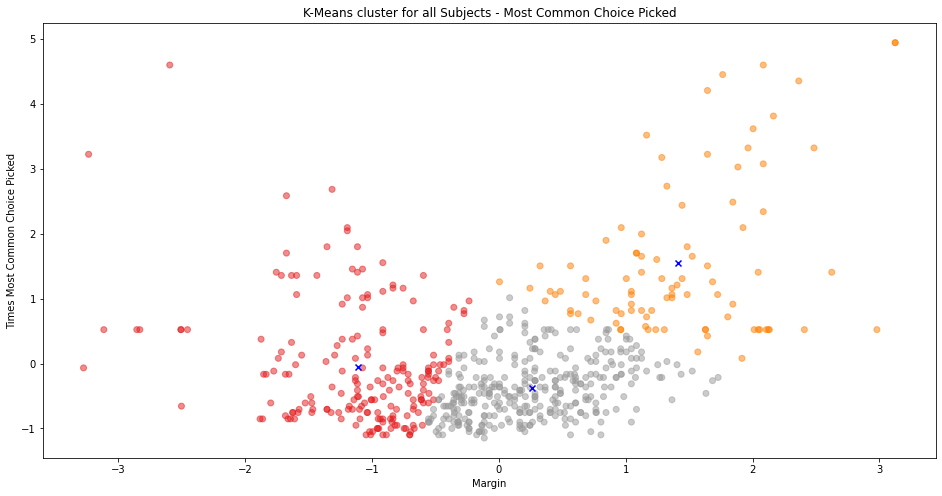

In [6]:
plt.figure(figsize=(16,8))
plt.scatter(standard['Margin'], standard['Most Common Choice Picked'], c= kmeans_margin_joined.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas_joined[:, 0], centroids_betas_joined[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for all Subjects - Most Common Choice Picked')
plt.xlabel('Margin')
plt.ylabel('Times Most Common Choice Picked')
plt.show()

In [7]:
centroids_betas_joined

array([[-1.10872288, -0.06074673],
       [ 1.41597414,  1.55028183],
       [ 0.25911929, -0.38263846]])

We can tell from our above cluster centres that cluster 0 is in red, cluster 1 is the right most cluster and cluster 2 is in grey.

In [8]:
standard['cluster'] = kmeans_margin_joined.labels_.tolist()
standard.head()

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber,cluster
0,1.044988,1.062672,1.234405,2.271920,-1.60938,1
1,-0.414346,-0.804770,1.234405,-0.410317,-1.60938,2
2,-0.474318,-0.559054,1.234405,0.268730,-1.60938,2
3,-0.294400,-0.559054,1.234405,0.370587,-1.60938,2
4,0.205371,-0.165908,1.234405,1.049635,-1.60938,2


In [9]:
cluster0 = standard[standard.cluster==0]
cluster0.head()

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber,cluster
16,-1.154008,0.374667,-0.923181,-1.233097,1.318707,0
20,-1.074044,-0.067622,-2.001975,-1.319109,1.318707,0
26,-0.594263,1.357531,-0.923181,-0.889046,1.318707,0
28,-1.673771,2.586111,-0.923181,-1.899695,1.318707,0
37,-1.193990,2.094679,-0.923181,-0.631008,1.318707,0


From looking at our graph and cluster 0, I feel data points with margin values less than -2 would be classified as noise.

In [10]:
noises = cluster0[cluster0.Margin <= -2]
noises

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber,cluster
43,-2.593351,4.600983,-0.923181,-2.114727,1.318707,0
49,-3.233059,3.224973,-0.923181,-2.566293,1.318707,0
287,-2.501393,-0.657340,-2.001975,-2.340510,-0.877358,0
404,-2.829243,0.522097,-0.923181,-1.630905,0.220674,0
450,-3.273040,-0.067622,-0.923181,-2.405019,0.586685,0
501,-2.853232,0.522097,-0.923181,-1.888943,0.586685,0
531,-2.453415,0.522097,-0.923181,-0.953555,0.586685,0
547,-3.113113,0.522097,-0.923181,-2.146981,0.586685,0
572,-2.505391,0.522097,-0.923181,-1.308358,0.586685,0
573,-2.505391,0.522097,-0.923181,-1.308358,0.586685,0


In [12]:
marginnoise = pd.DataFrame(np.random.uniform(-3.4,-2.5,15))

In [13]:
marginnoise = marginnoise.rename(columns={0: 'Margin'})
marginnoise.head()

,Margin
0,-2.542259
1,-3.255683
2,-3.016242
3,-2.921898
4,-3.195019


In [14]:
choicenoise = pd.DataFrame(np.random.uniform(-0.1,4,15))

,0
0,2.220171
1,2.045314
2,3.831233
3,3.094479
4,2.395261


In [15]:
choicenoise = choicenoise.rename(columns={0: 'Most Common Choice Picked'})
choicenoise.head()

,Most Common Choice Picked
0,2.220171
1,2.045314
2,3.831233
3,3.094479
4,2.395261


In [16]:
noise = pd.concat([marginnoise, choicenoise], axis=1)

Our noise data is now generated we add this back to the original dataset now.

In [39]:
noisesf = noises[['Margin', 'Most Common Choice Picked']]
noisesf = noisesf.to_numpy()
noisesf

array([[-2.59335066,  4.6009828 ],
       [-3.23305855,  3.22497306],
       [-2.50139265, -0.65734015],
       [-2.82924294,  0.52209677],
       [-3.2730403 , -0.06762169],
       [-2.85323199,  0.52209677],
       [-2.45341456,  0.52209677],
       [-3.11311332,  0.52209677],
       [-2.50539082,  0.52209677],
       [-2.50539082,  0.52209677]])

In [43]:
centroids_betas_joined[0]

array([-1.10872288, -0.06074673])

In [46]:
from scipy.spatial.distance import cdist
from scipy.spatial import distance

distances = distance.cdist(centroids_betas_joined, noisesf, 'euclidean')
distances[0]

array([4.89242699, 3.91264062, 1.51507518, 1.81656155, 2.16432834,
       1.8392984 , 1.46557233, 2.0874117 , 1.51340276, 1.51340276])

Our furtherest point away from the centroid of our choosen cluster 0 is the first point we see in the array here. This will be denoted as our data "d" the furtherest point from our centroid, C of cluster 0.

We now need to use this distance value obtained and combine it with our "noise offset ratio" denoted as α. From our previousy cited paper this value is typically in the range 0 - 0.05. We will use 0.05 for α here.